<a target="_blank" href="https://colab.research.google.com/github/pierclgr/Stable-Diffusion/blob/main/demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!git clone https://github.com/pierclgr/Stable-Diffusion/
!mv ./Stable-Diffusion/* ./*
!pip install -r requirements.txt

Cloning into 'Stable-Diffusion'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 55 (delta 17), reused 49 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 26.39 KiB | 818.00 KiB/s, done.
Resolving deltas: 100% (17/17), done.


Using device: mps


/Users/pierclgr/PyCharm Projects/Stable-Diffusion/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


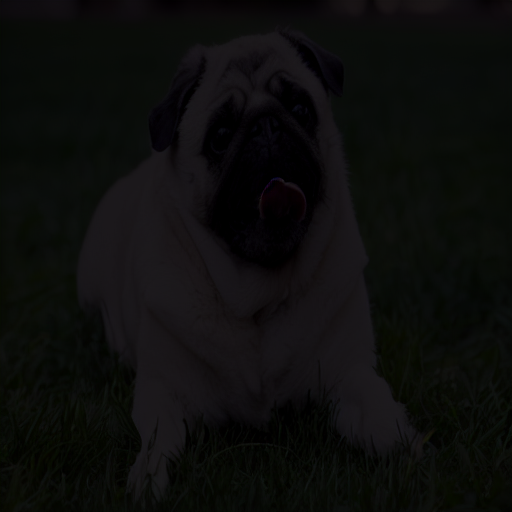

In [1]:
from src.utils import model_loader
from src import pipeline
from PIL import Image
import torch
from transformers import CLIPTokenizer

DEVICE = "cpu"
ALLOW_CUDA = True
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("tokenizer/vocab.json", merges_file="tokenizer/merges.txt")
model_file = "weights/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
negative_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    negative_prompt=negative_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler, 
    n_inference_steps=num_inference_steps, 
    models=models, 
    seed=seed,
    device=DEVICE, 
    idle_device="cpu", 
    tokenizer=tokenizer
)

# Combine the input image and the output image into a single image.
output_image = Image.fromarray(output_image)
display(output_image)